In [1]:
#Car project
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df=pd.read_csv("car.csv")

df

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.000
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.000
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.000
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.000
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.000
8123,8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.000
8124,8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.000
8125,8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.000


In [2]:
df.isna().sum()
df=df.dropna()
df=df.reset_index(drop=True)

In [3]:
#seats wrt selling_price
df['seats'].value_counts()
#We have only single 14 seater car so its better to drop that row (outlier)
idx=df['seats'].idxmax()
df=df.drop(index=idx)
df['seats'].value_counts()





5.000     6254
7.000     1120
8.000      235
4.000      133
9.000       80
6.000       62
10.000      19
2.000        2
Name: seats, dtype: int64

In [4]:
#Torque
df.dtypes
df.head(15)

#Drop torque column because of irregular data pattern
df=df.drop(columns=['torque'])
df

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.000
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.000
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.000
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.000
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.000
7902,8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.000
7903,8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.000
7904,8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.000


<AxesSubplot:xlabel='max_power'>

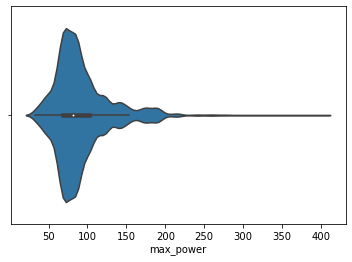

In [5]:
#MAx Power
df['max_power']=df['max_power'].apply(lambda x:x.split()[0])
#df['max_power'].astype("float32") -->Error

#Task--> Find illegal value in max_power column and drop it
#Hint -> USe Try except

df.dtypes
illegal=[]
for i in range(len(df)):
    try:
        float(df.iloc[i,-2])
    except:
        illegal.append(i)
df=df.drop(index=illegal).reset_index(drop=True)
df['max_power']=df['max_power'].astype("float32")
df.dtypes
import seaborn
seaborn.violinplot(x=df['max_power'])


<AxesSubplot:xlabel='engine'>

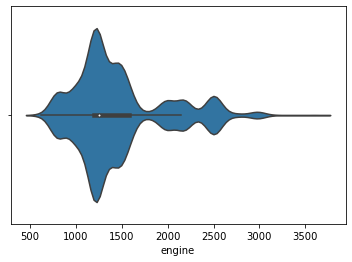

In [6]:
#Engine
df['engine']=df['engine'].apply(lambda x:x.split()[0])
illegal=[]
for i in range(len(df)):
    try:
        float(df.iloc[i,-3])
    except:
        illegal.append(i)
df=df.drop(index=illegal).reset_index(drop=True)
df['engine']=df['engine'].astype("float32")
df.dtypes
import seaborn
seaborn.violinplot(x=df['engine'])


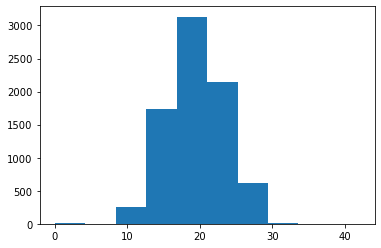

In [7]:
#Mileage
df['mileage']=df['mileage'].apply(lambda x:x.split()[0])
df['mileage']=df['mileage'].astype("float32")

from matplotlib import pyplot as plt
plt.hist(df['mileage'])
plt.show()

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

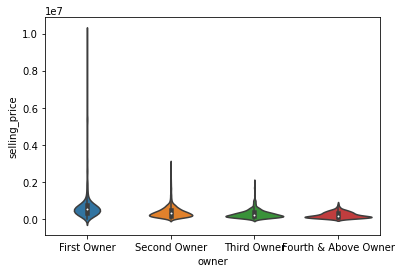

In [8]:
df
#Owner
df['owner'].value_counts()
df['owner']=df['owner'].replace({"Fifth":"Fourth & Above Owner"})
df['owner'].value_counts()
#This column is ordinal so we will use Label Encoding
f=df['owner']=='Test Drive Car'
df=df[~f].reset_index(drop=True)
df['owner'].value_counts()
#Test Drive Car is disturbing the ordinal relationship of column Thats why drop those categories

import seaborn
seaborn.violinplot(x=df['owner'],y=df['selling_price'])
#Above function will plot the distribution of each category in 'owner' wrt selling_price

Manual       6861
Automatic    1037
Name: transmission, dtype: int64


<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

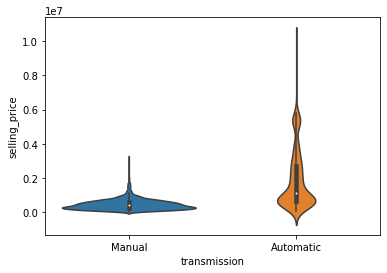

In [9]:
#transmission 
print(df['transmission'].value_counts())
seaborn.violinplot(x=df['transmission'],y=df['selling_price'])
#Describe?

#task-->Plot the bar graph of Type of transmission for each owner type  on one figure


Individual          6560
Dealer              1102
Trustmark Dealer     236
Name: seller_type, dtype: int64


<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

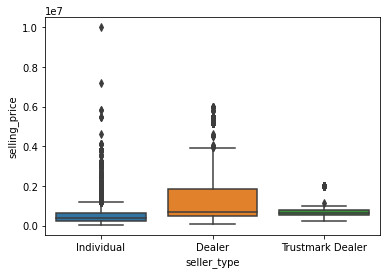

In [10]:
#sellertype

print(df['seller_type'].value_counts())
seaborn.boxplot(x=df['seller_type'],y=df['selling_price'])


<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

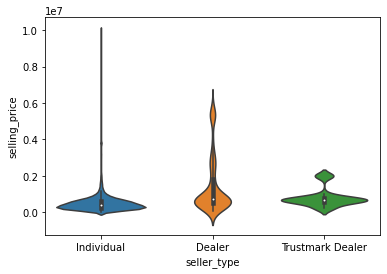

In [11]:
seaborn.violinplot(x=df['seller_type'],y=df['selling_price'])


Diesel    4297
Petrol    3514
CNG         52
LPG         35
Name: fuel, dtype: int64


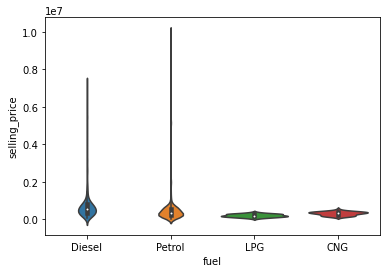

In [12]:
print(df['fuel'].value_counts())
seaborn.violinplot(x=df['fuel'],y=df['selling_price'])

#We can see the distribution of Petrol-Diesel is same  and LPG-CNG is overall same
#So MErge them

df['fuel']=df['fuel'].replace({"Petrol":0,"Diesel":0,"CNG":1,"LPG":1})


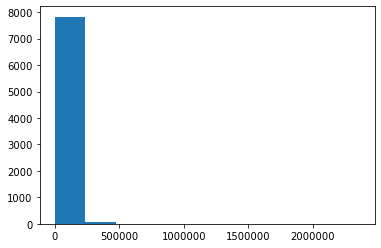

In [13]:
#Km driven
from matplotlib import pyplot as plt
plt.hist(df['km_driven'])
plt.ticklabel_format(style='plain')
plt.show()


In [14]:
#Task->Tell ratio of Cars with selling price between 1 lakh to 5 lakh ,5 lakh to 20 lakh , 20+ using Pie chart



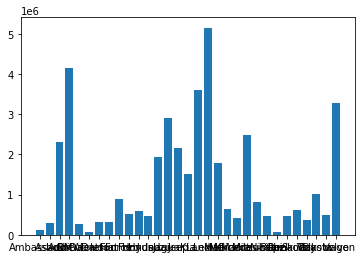

1    7168
0     426
2     304
Name: name, dtype: int64

In [15]:
#Name
np.set_printoptions(suppress=True)

df['name'].value_counts()

df['name']=df['name'].apply(lambda x:x.split()[0])
df['name'].value_counts()

#Brand    Selling_price
#When categories are more its need to merge them

#Group by
brands=df.groupby("name")
mean=brands['selling_price'].mean()

plt.bar(brands.groups.keys(),mean)
plt.show()

#Task--> Sort Brand names into 3 groups acc to their avg selling price
mean=mean.sort_values(ascending=False)

#We will merge the column according to the average selling price of brand
#Threee groups will be made of brands
def fxn(x):
    if x in mean.index[0:10]:
        return 0
    elif x in mean.index[10:25]:
        return 1
    else:
        return 2
    
df['name']=df['name'].apply(fxn)

df['name'].value_counts()

# Statistical analytics

In [16]:
df=df.iloc[:,1:]
df

numeric=df[['year','selling_price','km_driven','mileage','engine','max_power']]
print(numeric)
category=df[['name','fuel','seller_type','transmission','owner','seats']]

#Owner--> Label
#transmision=-> 0 1
#seller_type --> One hot encoding

#Convert all categories into numbers to apply statistical test over them

category['seller_type']=category['seller_type'].replace({"Individual":0,"Dealer":1,"Trustmark Dealer":2})
category['owner']=category['owner'].replace({"First Owner":0,"Second Owner":1,"Third Owner":2,"Fourth & Above Owner":3})
category['transmission']=category['transmission'].replace({"Manual":0,"Automatic":1})




      year  selling_price  km_driven  mileage   engine  max_power
0     2014         450000     145500   23.400 1248.000     74.000
1     2014         370000     120000   21.140 1498.000    103.520
2     2006         158000     140000   17.700 1497.000     78.000
3     2010         225000     127000   23.000 1396.000     90.000
4     2007         130000     120000   16.100 1298.000     88.200
...    ...            ...        ...      ...      ...        ...
7893  2013         320000     110000   18.500 1197.000     82.850
7894  2007         135000     119000   16.800 1493.000    110.000
7895  2009         382000     120000   19.300 1248.000     73.900
7896  2013         290000      25000   23.570 1396.000     70.000
7897  2013         290000      25000   23.570 1396.000     70.000

[7898 rows x 6 columns]


C:\Users\MANIND~1\AppData\Local\Temp/ipykernel_2764/1754036279.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category['seller_type']=category['seller_type'].replace({"Individual":0,"Dealer":1,"Trustmark Dealer":2})
C:\Users\MANIND~1\AppData\Local\Temp/ipykernel_2764/1754036279.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category['owner']=category['owner'].replace({"First Owner":0,"Second Owner":1,"Third Owner":2,"Fourth & Above Owner":3})
C:\Users\MANIND~1\AppData\Local\Temp/ipykernel_2764/1

<AxesSubplot:>

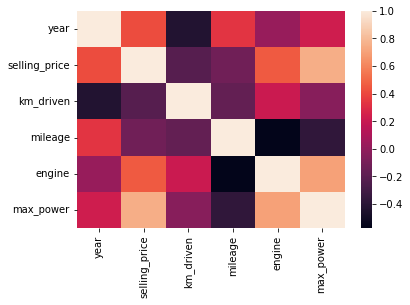

In [17]:
#Person Correlation Method
#This method is used to check wether two numeric columns are correlated with each other or not
#This method genrates a Correlation Matrix

#This method tells coefficient of Correlation between two variables
corr=numeric.corr()
corr


#Range of COC  --> -1 to +1


#Heatmap

import seaborn
seaborn.heatmap(corr)

In [18]:
#ANOVA-> Analysis of Variance
#In anova we find if categories Statistical values are same or not wrt to a numeric column
df

#Hypothesis testing
#H0(Null Hypothesis) --> Every Category variance is same
#H1(Alternative Hypothesis) --> Every Category variance is different


#Within sum of  square
#Between sum of square
#Degree of freedom

#F value-> F value represents the impact of categorical column on numeric column

from sklearn.feature_selection import SelectKBest,f_classif
#SelectKbest method is used to sort the important columns according to test passed in parameters of it
#f_classif method will calculate Fvalue using anova test
select=SelectKBest(f_classif,k=6)#k value represents how many columns we want based on test
result=select.fit_transform(category,numeric['selling_price'])
#In result there are important columns sorted acc to fvalue 
result
select.scores_#Tell fvalue of each column


array([12.62331505,  1.66255597,  6.75364883, 12.03066124,  3.72501674,
        2.69501849])

Note: Here You have to select the optimal number of k value which is number of top important columns you want.For instance We are selecting all columns but you can tune this parameter by selecting less number of columns and rerun the whole project

# Outlier Detection

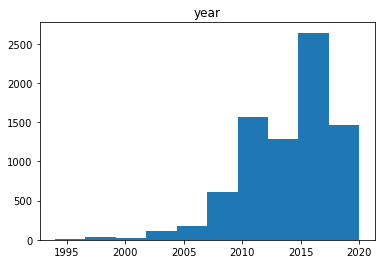

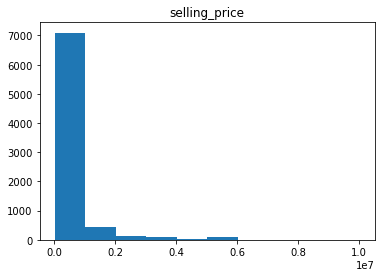

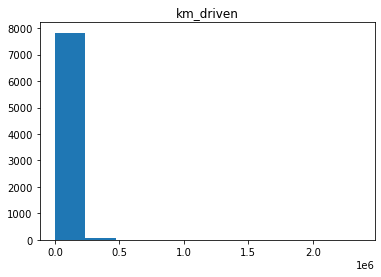

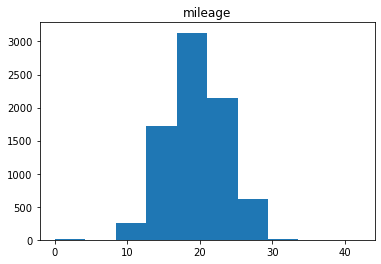

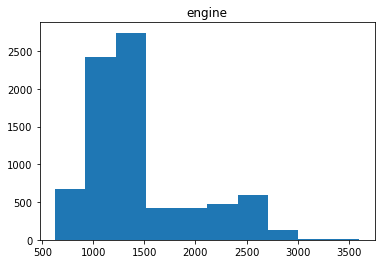

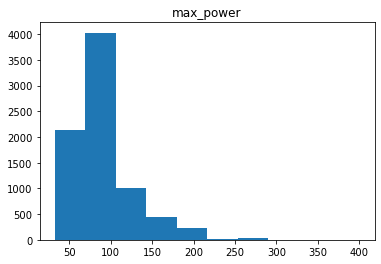

In [19]:
#Outliers --> Points that are away from general pattern of a data

#To detect outlier 
#Normal distribution --> IQ ,Zscore .....

#Non Normal --> DBSCAN- Density Based Spatial Application with Noise


for x in numeric.columns:
    plt.hist(numeric[x])
    plt.title(x)
    plt.show()

In [20]:
#ZSCORE Method

# x-xmean/std deviation

def Z(column):
    mean=column.mean()
    std=column.std()
    zscores=(column-mean)/std
    f=(zscores>3) | (zscores< -3)
    return column[f]

outliers1=Z(numeric["km_driven"])
outliers2=Z(numeric["mileage"])
outliers3=Z(numeric['max_power'])




numeric=numeric.drop(index=outliers1.index).reset_index(drop=True)
category=category.drop(index=outliers1.index).reset_index(drop=True)

numeric=numeric.drop(index=outliers2.index).reset_index(drop=True)
category=category.drop(index=outliers2.index).reset_index(drop=True)

numeric=numeric.drop(index=outliers3.index).reset_index(drop=True)
category=category.drop(index=outliers3.index).reset_index(drop=True)

print(len(numeric),len(category))

7714 7714


# DBSCAN

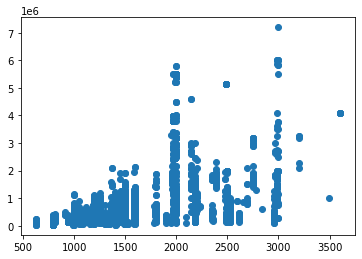

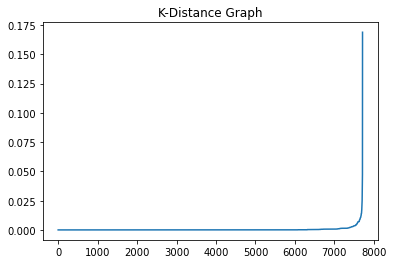

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26]


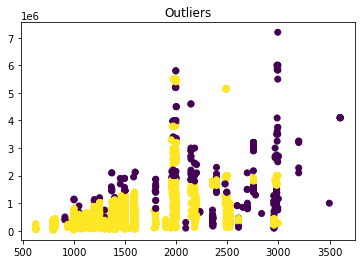

7473


In [21]:
#DBSCAN is a non parametric algorithim that is used to take out the noise from dataset by clustering into labels 
engine=numeric[['engine','selling_price']]

plt.scatter(engine['engine'],engine['selling_price'])
plt.show()

#Value of epsilon  and n?
#To find the optimal value of epsilon we will make K-Distance Graph
#K distance graph--> Tells the Trend of nearest distances of each point

#Why scaling --> Because we have to analyze the distances of points
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
engine=mn.fit_transform(engine)

#Step1--> Find out value of epsilon and n samples
#Step 2--> Make K-distance graph
#       2(a)--> Find out NEarest neigbors of each point

from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=10)#n_neighbors means how many neighbors we want

nn.fit(engine)#Calculate the nearest neighbors of each point

distances,indexes=nn.kneighbors(engine)#kneighbors function tells the index and distance of each 10 neighbors wrt to each point
distances.shape

#    2(b) --> Sort the distance
distances=np.sort(distances,axis=0)
#    2(c) --> Extract out nearest neighbor distances
distances=distances[:,1]
#Note: Why we extarct 1column--> 0th column contain distance of point with itself
#   2(d) --> Plot the line plot
plt.plot(distances)
plt.title("K-Distance Graph")
plt.show()
#   2(e) --> select that point of graph where curve is bending

#step 3--> Run DBSCAN ALgorithim
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.015,min_samples=10)#min_samples will be choosen aacording to domain knowledge
dbscan.fit(engine)
#Dbscan will label the samples into   Core point,.  Border Point  Noise

print(np.unique(dbscan.labels_))
#In labels_ dbscan will label the noise with -1
#Step4 --> Remove the rows with -1 label

colors=dbscan.labels_
colors[colors!=-1]=0
plt.scatter(numeric['engine'],numeric['selling_price'],c=colors)
plt.title("Outliers")
plt.show()


numeric=numeric[~(dbscan.labels_==-1)]#It will return those rows with labels except than -1
category=category[~(dbscan.labels_==-1)]
print(len(numeric))
#Task--> Make scatter plot of engine with points colored differently according to dbscan.labels_

In [22]:
X=numeric.drop(columns=['selling_price'])
X=pd.concat((X,category),axis=1)

y=numeric['selling_price']
X,y

(      year  km_driven  mileage   engine  max_power  name  fuel  seller_type  \
 0     2014     145500   23.400 1248.000     74.000     1     0            0   
 1     2014     120000   21.140 1498.000    103.520     1     0            0   
 2     2006     140000   17.700 1497.000     78.000     1     0            0   
 3     2010     127000   23.000 1396.000     90.000     1     0            0   
 4     2007     120000   16.100 1298.000     88.200     1     0            0   
 ...    ...        ...      ...      ...        ...   ...   ...          ...   
 7709  2013     110000   18.500 1197.000     82.850     1     0            0   
 7710  2007     119000   16.800 1493.000    110.000     1     0            0   
 7711  2009     120000   19.300 1248.000     73.900     1     0            0   
 7712  2013      25000   23.570 1396.000     70.000     1     0            0   
 7713  2013      25000   23.570 1396.000     70.000     1     0            0   
 
       transmission  owner  seats  
 0

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9729960382685086


In [26]:

temp=np.reshape(X[0,:],(1,X[0,:].shape[0]))
regressor.predict(temp)

array([492669.93])

In [27]:
#Method use to find best parameters of any model
#Grid Search CV  
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

#Grid search cv is a method that automatically choose best parameters for training model
#which leads to improved score

param_grid={"max_depth":[10,20,50,100,200,300],
           "min_samples_split":[5,10,11,20],
           "n_estimators":[40,50,100,200]}

from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=regressor,param_grid=param_grid,cv=5,scoring="r2")

grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 50, 100, 200, 300],
                         'min_samples_split': [5, 10, 11, 20],
                         'n_estimators': [40, 50, 100, 200]},
             scoring='r2')

In [29]:

print("BEst score",grid.best_score_)
print("BEst parameters",grid.best_params_)

regressor=RandomForestRegressor(max_depth=200,min_samples_split=5,n_estimators=100)
regressor.fit(X_train,y_train)

#Testing


y_pred=regressor.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

BEst score 0.9797946404029512
BEst parameters {'max_depth': 200, 'min_samples_split': 5, 'n_estimators': 100}
0.9733830359568914
